In [5]:
import pandas as pd
import seaborn as sns
from sklearn import tree 
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

from sklearn.tree import export_graphviz

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import make_scorer,f1_score,recall_score,precision_score

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [6]:
a=load_iris()
df=pd.DataFrame(a.data, columns=a.feature_names)
print(a.feature_names)
print("\n")
df['target']= a.target

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']




In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [11]:
df.shape

(150, 5)

<AxesSubplot:>

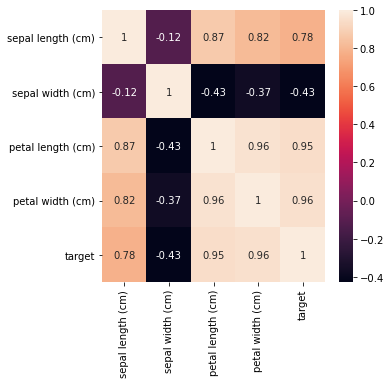

In [12]:
corr = df.corr()
plt.figure(figsize=(5,5)) 
sns.heatmap(corr, annot=True)

In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(df[a.feature_names],df['target'])
print(len(X_train))
print(len(X_test))

112
38


In [14]:
DT=DecisionTreeClassifier(criterion="gini")

In [15]:
model=DT.fit(X_train,Y_train)
y_preds=model.predict(X_test)
print(y_preds)
print(a.feature_names)
print("\n")

[1 1 2 1 2 0 0 1 2 2 0 2 2 2 1 0 2 1 2 2 0 1 2 1 0 0 2 1 1 1 1 0 1 2 0 0 0
 1]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']




[Text(310.0, 761.2916666666666, 'petal length (cm) <= 2.6\ngini = 0.666\nsamples = 112\nvalue = [35, 38, 39]\nclass = virginica'),
 Text(232.5, 622.875, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]\nclass = setosa'),
 Text(387.5, 622.875, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 77\nvalue = [0, 38, 39]\nclass = virginica'),
 Text(155.0, 484.45833333333337, 'sepal length (cm) <= 4.95\ngini = 0.139\nsamples = 40\nvalue = [0, 37, 3]\nclass = versicolor'),
 Text(77.5, 346.0416666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(232.5, 346.0416666666667, 'petal length (cm) <= 4.95\ngini = 0.097\nsamples = 39\nvalue = [0, 37, 2]\nclass = versicolor'),
 Text(155.0, 207.625, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]\nclass = versicolor'),
 Text(310.0, 207.625, 'petal width (cm) <= 1.55\ngini = 0.5\nsamples = 4\nvalue = [0, 2, 2]\nclass = versicolor'),
 Text(232.5, 69.20833333333337, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = virginica'),
 Te

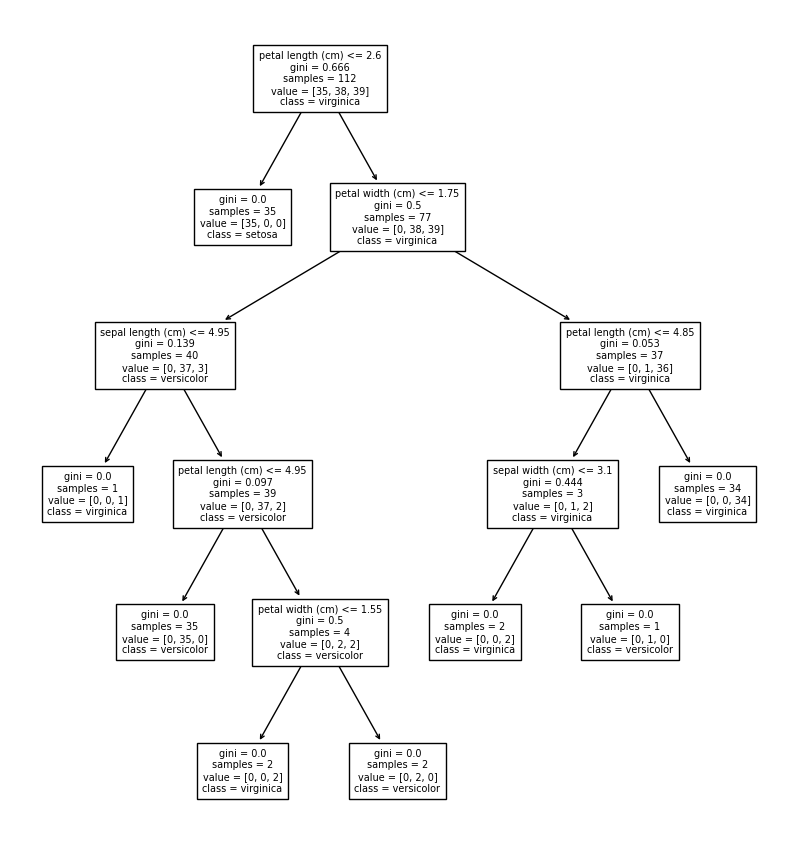

In [14]:
axes=plt.subplots(nrows=1,ncols=1,figsize=(10,11),dpi=100)
tree.plot_tree(DT,fontsize=7,feature_names=a.feature_names,class_names=a.target_names)

In [16]:
labels=[0,1,2]
cmx=confusion_matrix(Y_test,y_preds,labels)
print("\n confusion matrix:\n",cmx)


 confusion matrix:
 [[11  0  0]
 [ 0 13  2]
 [ 0  1 11]]


C:\Users\chama\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[0, 1, 2] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [17]:
 print(classification_report(Y_test,y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      0.87      0.90        15
           2       0.85      0.92      0.88        12

    accuracy                           0.92        38
   macro avg       0.92      0.93      0.93        38
weighted avg       0.92      0.92      0.92        38

